# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
datetime.datetime.strptime

<function datetime.strptime>

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import sqlite3
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# Loading&Reading Data

In [ ]:
df_call = pd.read_csv("/content/drive/MyDrive/ibb_data_mapping.csv")
df_loc = pd.read_csv('/content/drive/MyDrive/istanbul_ilce_koord_tr.csv', sep=';')
df_population = pd.read_excel('/content/drive/MyDrive/2019-yl-belediye-nufuslar.xlsx')
df_prepared = pd.read_csv("/content/drive/MyDrive/prepared_data.csv")

In [ ]:
df_prepared = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prepared_data")

In [ ]:
df_prepared

,BASVURU_KODU,ACILIS_TARIHI,KAPANIS_TARIHI,BASVURU_TANIMI,ILGILI_BIRIM,KONU,ALT_KONU,KANAL,DURUM,ILCE
0,1-15193192054,2019-04-06 09:01:32,2020-09-02 20:33:08,Agac dusmesin diye direk koymuslardi ayag dire...,BEŞİKTAŞ BELEDİYESİ,İLÇE PARK BAHÇELER,PARK BAHÇELER,Mobil,Kapandı,BEŞİKTAŞ
1,1-15335992153,2019-04-11 10:46:13,2020-08-20 11:12:49,A-2 BLOK DAİRE 99 KAT 12 İKAMET ETMEKTEYİM ÇAT...,KİPTAŞ,KONUTLAR,DAİRE İÇİ AKSAKLIKLAR,WhatsApp,Kapandı,EYÜPSULTAN
2,1-15931298015,2019-04-30 11:30:41,2020-09-08 11:27:03,ÇATALCA KİPTAŞ KONUTLARI NORMALDE SON TARİH OL...,KİPTAŞ,KONUTLAR,TAPU,Telefon,Kapandı,ÇATALCA
3,1-16232695554,2019-05-08 12:47:53,2020-08-26 09:03:46,(çalıştığım kurumdaki haksızlıklar )ben cenaz...,İSPER A.Ş.,ŞEHİR TUVALETLERİ,WC ÜCRETLERİ,Web,Kapandı,SULTANGAZİ
4,1-16897632987,2019-05-29 17:18:26,2020-08-11 10:59:24,Cadde üzerinde bulunan trafik levhasının hasar...,TRAFİK MÜDÜRLÜĞÜ,YERİNDE ÇÖZÜM,LEVHA PROBLEMİ,Tespit,Kapandı,KAĞITHANE
...,...,...,...,...,...,...,...,...,...,...
2914099,1-35891868928,2020-10-17 23:49:34,2020-10-17 23:51:42,İLÇE BELEDİYESİ BV,BEYOĞLU BELEDİYESİ,İLÇE DENETİM,DENETİM,Telefon,Kapandı,BEYOĞLU
2914100,1-35892287955,2020-10-17 23:51:28,2020-10-17 23:53:27,AY-Aksama Yok,İETT GENEL MÜDÜRLÜĞÜ,HAT VE GÜZERGAH,OTOBÜS ANLIK BİLGİ,Telefon,Kapandı,KADIKÖY
2914101,1-35893768081,2020-10-17 23:54:04,2020-10-17 23:56:04,Sosyal yardım başvurusu hakkında bilgi verild...,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,İSTANBUL KART GIDA,Telefon,Kapandı,SANCAKTEPE
2914102,1-35893903906,2020-10-17 23:55:46,2020-10-17 23:57:17,AY-Aksama Yok,İETT GENEL MÜDÜRLÜĞÜ,HAT VE GÜZERGAH,OTOBÜS ANLIK BİLGİ,Telefon,Kapandı,KÜÇÜKÇEKMECE


In [ ]:
df_deneme = df_prepared.groupby('ILCE')['BASVURU_KODU'].count()
df_deneme = df_deneme.rename_axis('ILCE').to_frame('Başvuru_sayısı')
df_deneme.reset_index(inplace=True)
pd.set_option('display.max_rows', None)
df_deneme
df_deneme2 = df_deneme.sort_values(by = ['Başvuru_sayısı'], ascending=False)
x = df_deneme2['ILCE']
y = df_deneme2['Başvuru_sayısı']

Text(0.5, 1.0, ' ')

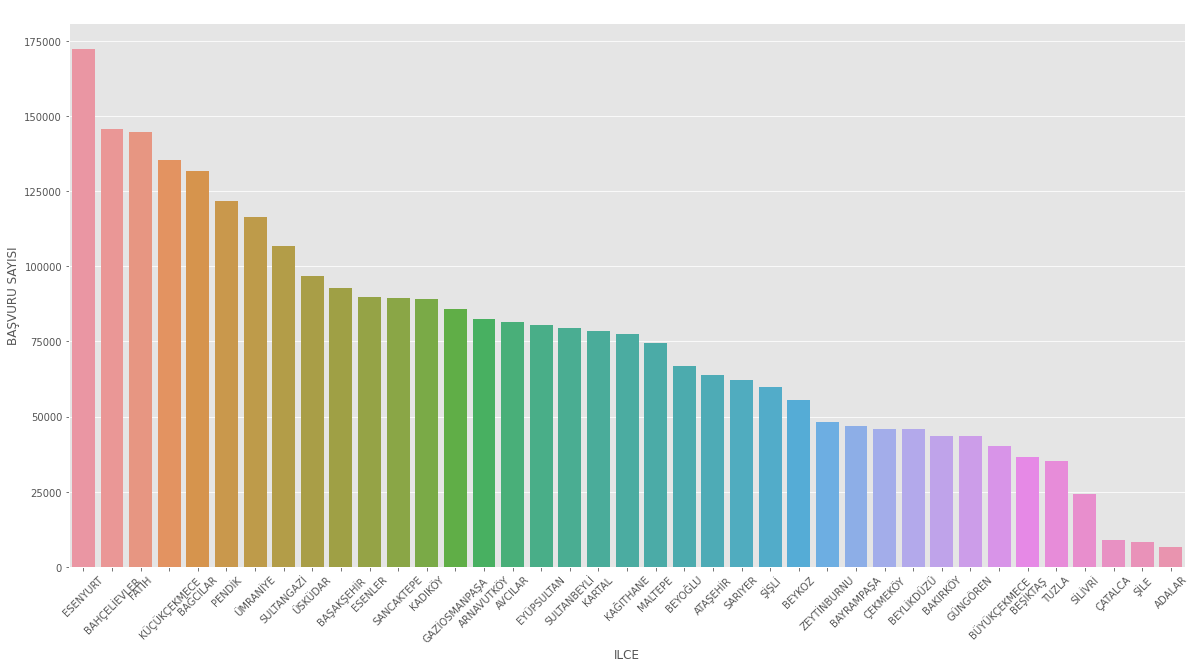

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(20, 10))  

sns.barplot(x = df_deneme2['ILCE'], y =df_deneme2['Başvuru_sayısı']) 

plt.xticks(rotation=45)

plt.xlabel("ILCE")
plt.ylabel("BAŞVURU SAYISI")

plt.title(" ")


In [ ]:
df_prepared['ACILIS_TARIHI'] = pd.to_datetime(df_prepared['ACILIS_TARIHI'],format='%Y/%m/%d %H:%M:%S')


In [ ]:
df_prepared['SADE_ACILIS_TARIHI'] = df_prepared['ACILIS_TARIHI'].dt.date
df_prepared[['ACILIS_TARIHI','SADE_ACILIS_TARIHI']].head()


,ACILIS_TARIHI,SADE_ACILIS_TARIHI
0,2019-04-06 09:01:32,2019-04-06
1,2019-04-11 10:46:13,2019-04-11
2,2019-04-30 11:30:41,2019-04-30
3,2019-05-08 12:47:53,2019-05-08
4,2019-05-29 17:18:26,2019-05-29


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_prepared.groupby('SADE_ACILIS_TARIHI')['BASVURU_KODU'].count().head()

NameError: ignored

In [ ]:
df_dates = df_prepared.groupby('SADE_ACILIS_TARIHI')['BASVURU_KODU'].count()

In [ ]:
df_dates = df_dates.rename_axis('SADE_ACILIS_TARIHI').to_frame('BASVURU_KODU')


In [ ]:
df_dates.reset_index(inplace=True)


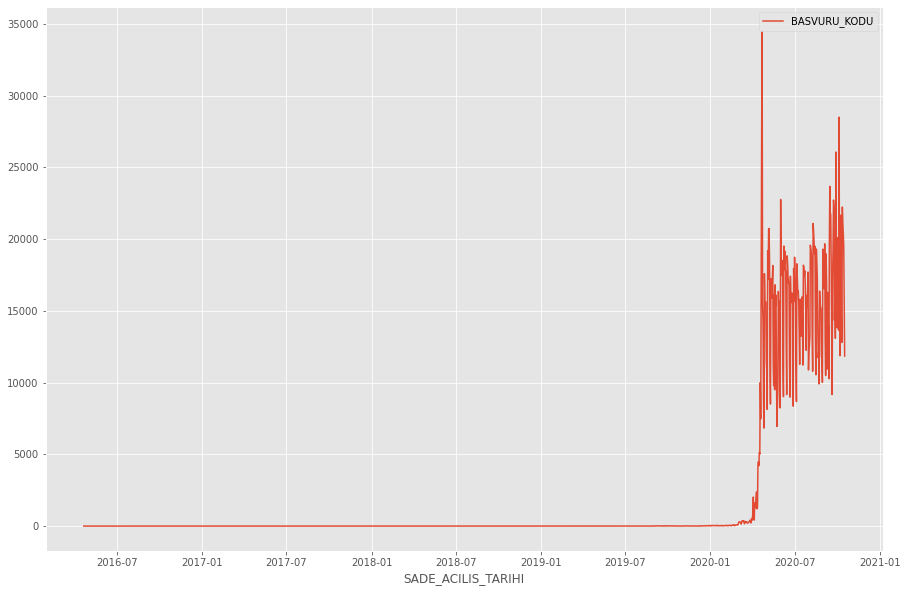

In [ ]:
df_dates.plot(x='SADE_ACILIS_TARIHI', y='BASVURU_KODU',figsize=(15,10))

In [ ]:
df_anomali = df_dates.loc[252:]

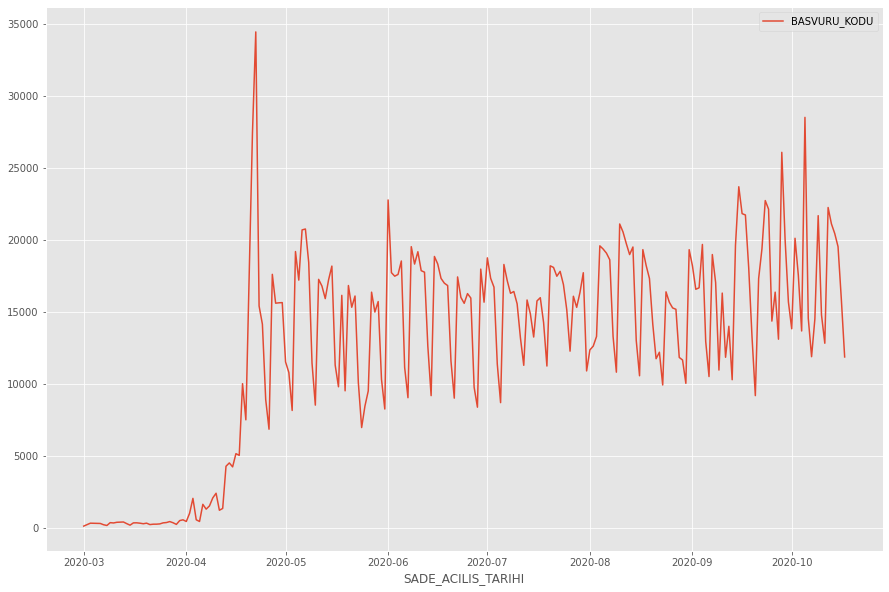

In [ ]:
df_anomali.plot(x='SADE_ACILIS_TARIHI', y='BASVURU_KODU', figsize= (15,10))


## Visualization Based on Population 

In [ ]:
df_population.sort_values(by='2019 yılı nüfusları', ascending=False, inplace=True)

<BarContainer object of 39 artists>

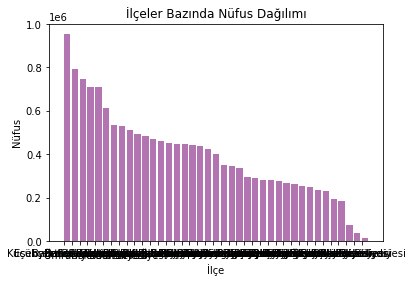

In [ ]:
x=df_population['Belediyeler']
y=df_population['2019 yılı nüfusları']

plt.title('İlçeler Bazında Nüfus Dağılımı')
plt.xlabel('İlçe')
plt.ylabel('Nüfus')
plt.bar(x,y, color = (0.5,0.1,0.5,0.6), align='edge', )
#plt.xlabel('Saat', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')

## Mapping Based on Location and Calls Density

In [ ]:
df_loc["enlem"] = df_loc["enlem"].str.replace(",",".")
df_loc["boylam"] = df_loc["boylam"].str.replace(",",".")
df_loc["enlem"] = df_loc["enlem"].astype(float)
df_loc["boylam"] = df_loc["boylam"].astype(float)

In [ ]:
df_call.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df = df_call.merge(df_loc, left_on="ILCE", right_on="ilce")

In [ ]:
df.sort_values(by='TARIH',inplace=True)

In [ ]:
df.drop(labels=[0,269],axis='index', inplace=True)
df.drop(columns="ilce", inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(columns='index', axis=1, inplace=True)

In [ ]:
df.rename(columns={'level_0':'index'}, inplace=True)

In [ ]:
df = df.loc[2080:]

**Nisan ve Ekim ayları arasında lokasyona bağlı olarak gruplandırılmış gelen çağrı sayılarının yoğunluğunu gösteren Interaktif Mapping**

In [ ]:
fig = px.scatter_mapbox(df, lat="enlem", lon="boylam", hover_name="ILCE", hover_data=['TARIH','GUNLUK_CAGRI_SAYISI'],animation_frame=df["TARIH"],
                         size="GUNLUK_CAGRI_SAYISI",color="GUNLUK_CAGRI_SAYISI", zoom=9.5, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_lokasyon = pd.read_csv("/content/drive/MyDrive/IBB_KODLUYORUZ/sample_giz.csv")

In [ ]:
df_lokasyon

,Unnamed: 0,BASVURU_KODU,ACILIS_TARIHI,KAPANIS_TARIHI,BASVURU_TANIMI,ILGILI_BIRIM,KONU,ALT_KONU,KANAL,DURUM,ILCE,MAHALLE,ONLY_OPEN_DATE,TIME_O,MONTH_O,MONTH_NAME_O,DAY_O,diff_month,diff_days,diff_hours,ONLY_CLOSE_DATE,TIME_C,MONTH_C,MONTH_NAME_C,DAY_C
0,45,1-21114617268,2019-10-07 15:19:57,2020-09-23 15:20:09,\n149175 SAYI VE 24/07/2019 TARİHLİ BAŞVURU\n\...,MEDYA A.Ş.,İSTWEB / MODYO,YAYIN İÇERİĞİ,BEHAK Posta,Kapandı,ADALAR,NaN,2019-10-07,15:19:57,10,October,7,11,352,8448,2020-09-23,15:20:09,9,September,23
1,95,1-24736922550,2019-12-28 12:11:58,2020-09-17 09:58:05,İstek/Şikayet Formu\nBildirim Tipi: Öneri\nYor...,ITAKSI,İTAKSİ,MOBİL UYGULAMA,ITaksi Mobil,Kapandı,ADALAR,NaN,2019-12-28,12:11:58,12,December,28,9,263,6333,2020-09-17,09:58:05,9,September,17
2,126,1-24831162166,2020-01-07 17:44:50,2020-08-04 15:02:27,İstek/Şikayet Formu\nBildirim Tipi: Şikayet\nY...,ITAKSI,İTAKSİ,İTAKSİ CİHAZI,ITaksi Mobil,Kapandı,ADALAR,NaN,2020-01-07,17:44:50,1,January,7,7,209,5037,2020-08-04,15:02:27,8,August,4
3,213,1-25397256969,2020-03-03 06:14:35,2020-09-17 16:58:10,İstek/Şikayet Formu\nBildirim Tipi: Öneri\nYor...,ITAKSI,İTAKSİ,MOBİL UYGULAMA,ITaksi Mobil,Kapandı,ADALAR,NaN,2020-03-03,06:14:35,3,March,3,6,198,4762,2020-09-17,16:58:10,9,September,17
4,411,1-26648297944,2020-03-28 18:23:52,2020-08-11 22:04:01,Sn belediye başkanım ve yetkililer bildiğiniz ...,İŞTİRAKLER KOORDİNASYON MÜDÜRLÜĞÜ,İNSAN KAYNAKLARI,İŞTİRAKLER,Web,Kapandı,ADALAR,NaN,2020-03-28,18:23:52,3,March,28,5,136,3267,2020-08-11,22:04:01,8,August,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,5611,1-29366300531,2020-05-17 22:17:10,2020-08-14 15:57:11,erzak yardımı talep eder.,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,ERZAK KOLİSİ YARDIMI,Telefon,Kapandı,ZEYTİNBURNU,NURİPAŞA,2020-05-17,22:17:10,5,May,17,3,88,2129,2020-08-14,15:57:11,8,August,14
3896,5694,1-29408035781,2020-05-18 14:10:44,2020-08-14 15:29:44,YARDIM İÇİN BAŞVURUDA BULUNDUM OLUMLU CEVAP VE...,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,İSTANBUL HALK SÜT,Yüzyüze,Kapandı,ZEYTİNBURNU,GÖKALP,2020-05-18,14:10:44,5,May,18,3,88,2113,2020-08-14,15:29:44,8,August,14
3897,5869,1-29465342542,2020-05-19 13:26:16,2020-08-11 15:42:58,YARDIM TALEP EDİYORUM YAŞLIYIM İHTİYACIM VAR.,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,İSTANBUL KART GIDA,Telefon,Kapandı,ZEYTİNBURNU,BEŞTELSİZ,2020-05-19,13:26:16,5,May,19,3,84,2018,2020-08-11,15:42:58,8,August,11
3898,5927,1-29473013564,2020-05-19 15:54:09,2020-08-19 14:51:47,Pandemin olarak askida faturaya basvuruda bulu...,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,ASKIYA FATURA BIRAKMAK,Web,Kapandı,ZEYTİNBURNU,TELSİZ,2020-05-19,15:54:09,5,May,19,3,91,2206,2020-08-19,14:51:47,8,August,19


In [ ]:
labelencoder = LabelEncoder()

In [ ]:
df_lokasyon['DURUM_CAT'] = labelencoder.fit_transform(df_lokasyon['DURUM'])
df_lokasyon

,Unnamed: 0,BASVURU_KODU,ACILIS_TARIHI,KAPANIS_TARIHI,BASVURU_TANIMI,ILGILI_BIRIM,KONU,ALT_KONU,KANAL,DURUM,ILCE,MAHALLE,ONLY_OPEN_DATE,TIME_O,MONTH_O,MONTH_NAME_O,DAY_O,diff_month,diff_days,diff_hours,ONLY_CLOSE_DATE,TIME_C,MONTH_C,MONTH_NAME_C,DAY_C,DURUM_CAT
0,45,1-21114617268,2019-10-07 15:19:57,2020-09-23 15:20:09,\n149175 SAYI VE 24/07/2019 TARİHLİ BAŞVURU\n\...,MEDYA A.Ş.,İSTWEB / MODYO,YAYIN İÇERİĞİ,BEHAK Posta,Kapandı,ADALAR,NaN,2019-10-07,15:19:57,10,October,7,11,352,8448,2020-09-23,15:20:09,9,September,23,1
1,95,1-24736922550,2019-12-28 12:11:58,2020-09-17 09:58:05,İstek/Şikayet Formu\nBildirim Tipi: Öneri\nYor...,ITAKSI,İTAKSİ,MOBİL UYGULAMA,ITaksi Mobil,Kapandı,ADALAR,NaN,2019-12-28,12:11:58,12,December,28,9,263,6333,2020-09-17,09:58:05,9,September,17,1
2,126,1-24831162166,2020-01-07 17:44:50,2020-08-04 15:02:27,İstek/Şikayet Formu\nBildirim Tipi: Şikayet\nY...,ITAKSI,İTAKSİ,İTAKSİ CİHAZI,ITaksi Mobil,Kapandı,ADALAR,NaN,2020-01-07,17:44:50,1,January,7,7,209,5037,2020-08-04,15:02:27,8,August,4,1
3,213,1-25397256969,2020-03-03 06:14:35,2020-09-17 16:58:10,İstek/Şikayet Formu\nBildirim Tipi: Öneri\nYor...,ITAKSI,İTAKSİ,MOBİL UYGULAMA,ITaksi Mobil,Kapandı,ADALAR,NaN,2020-03-03,06:14:35,3,March,3,6,198,4762,2020-09-17,16:58:10,9,September,17,1
4,411,1-26648297944,2020-03-28 18:23:52,2020-08-11 22:04:01,Sn belediye başkanım ve yetkililer bildiğiniz ...,İŞTİRAKLER KOORDİNASYON MÜDÜRLÜĞÜ,İNSAN KAYNAKLARI,İŞTİRAKLER,Web,Kapandı,ADALAR,NaN,2020-03-28,18:23:52,3,March,28,5,136,3267,2020-08-11,22:04:01,8,August,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,5611,1-29366300531,2020-05-17 22:17:10,2020-08-14 15:57:11,erzak yardımı talep eder.,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,ERZAK KOLİSİ YARDIMI,Telefon,Kapandı,ZEYTİNBURNU,NURİPAŞA,2020-05-17,22:17:10,5,May,17,3,88,2129,2020-08-14,15:57:11,8,August,14,1
3896,5694,1-29408035781,2020-05-18 14:10:44,2020-08-14 15:29:44,YARDIM İÇİN BAŞVURUDA BULUNDUM OLUMLU CEVAP VE...,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,İSTANBUL HALK SÜT,Yüzyüze,Kapandı,ZEYTİNBURNU,GÖKALP,2020-05-18,14:10:44,5,May,18,3,88,2113,2020-08-14,15:29:44,8,August,14,1
3897,5869,1-29465342542,2020-05-19 13:26:16,2020-08-11 15:42:58,YARDIM TALEP EDİYORUM YAŞLIYIM İHTİYACIM VAR.,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,İSTANBUL KART GIDA,Telefon,Kapandı,ZEYTİNBURNU,BEŞTELSİZ,2020-05-19,13:26:16,5,May,19,3,84,2018,2020-08-11,15:42:58,8,August,11,1
3898,5927,1-29473013564,2020-05-19 15:54:09,2020-08-19 14:51:47,Pandemin olarak askida faturaya basvuruda bulu...,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,ASKIYA FATURA BIRAKMAK,Web,Kapandı,ZEYTİNBURNU,TELSİZ,2020-05-19,15:54:09,5,May,19,3,91,2206,2020-08-19,14:51:47,8,August,19,1


In [ ]:
df_lokasyon.isnull().sum()

Unnamed: 0            0
BASVURU_KODU          0
ACILIS_TARIHI         0
KAPANIS_TARIHI        0
BASVURU_TANIMI        2
ILGILI_BIRIM          0
KONU                  0
ALT_KONU              0
KANAL                 0
DURUM                 0
ILCE                  0
MAHALLE            1130
ONLY_OPEN_DATE        0
TIME_O                0
MONTH_O               0
MONTH_NAME_O          0
DAY_O                 0
diff_month            0
diff_days             0
diff_hours            0
ONLY_CLOSE_DATE       0
TIME_C                0
MONTH_C               0
MONTH_NAME_C          0
DAY_C                 0
DURUM_CAT             0
dtype: int64

In [ ]:
x = df_lokasyon["MONTH_O"]
y = df_lokasyon['diff_month']

In [ ]:
#Çağrı açılış ayının çağrının kapanma süresine göre Bubble Plot görselleştirmesi

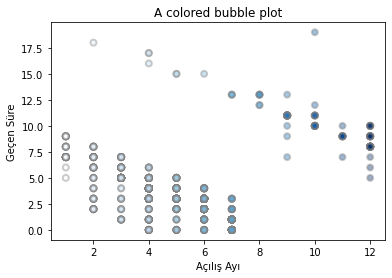

In [ ]:
plt.scatter(x, y, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
plt.xlabel("Açılış Ayı")
plt.ylabel("Geçen Süre")
plt.title("A colored bubble plot")
 
plt.show()

In [ ]:
(df_lokasyon["KONU"]).groupby

<bound method Series.groupby of 0         İSTWEB / MODYO
1                 İTAKSİ
2                 İTAKSİ
3                 İTAKSİ
4       İNSAN KAYNAKLARI
              ...       
3895    SOSYAL HİZMETLER
3896    SOSYAL HİZMETLER
3897    SOSYAL HİZMETLER
3898    SOSYAL HİZMETLER
3899    SOSYAL HİZMETLER
Name: KONU, Length: 3900, dtype: object>

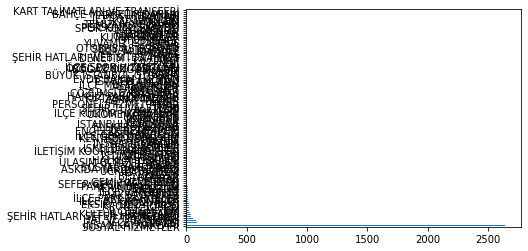

In [ ]:
df_lokasyon["KONU"].value_counts().plot.barh()

In [ ]:
#Hangi ilçe belediyeye hangi kanallar aracılığı ile ulaştığının görselleştirilmesi

In [ ]:
barWidth = 0.3
# Choose the height of the blue bars
bars1 = df_lokasyon["MONTH_O"]
 
# Choose the height of the cyan bars
bars2 = df_lokasyon["MONTH_C"]


Text(0, 0.5, 'KANAL')

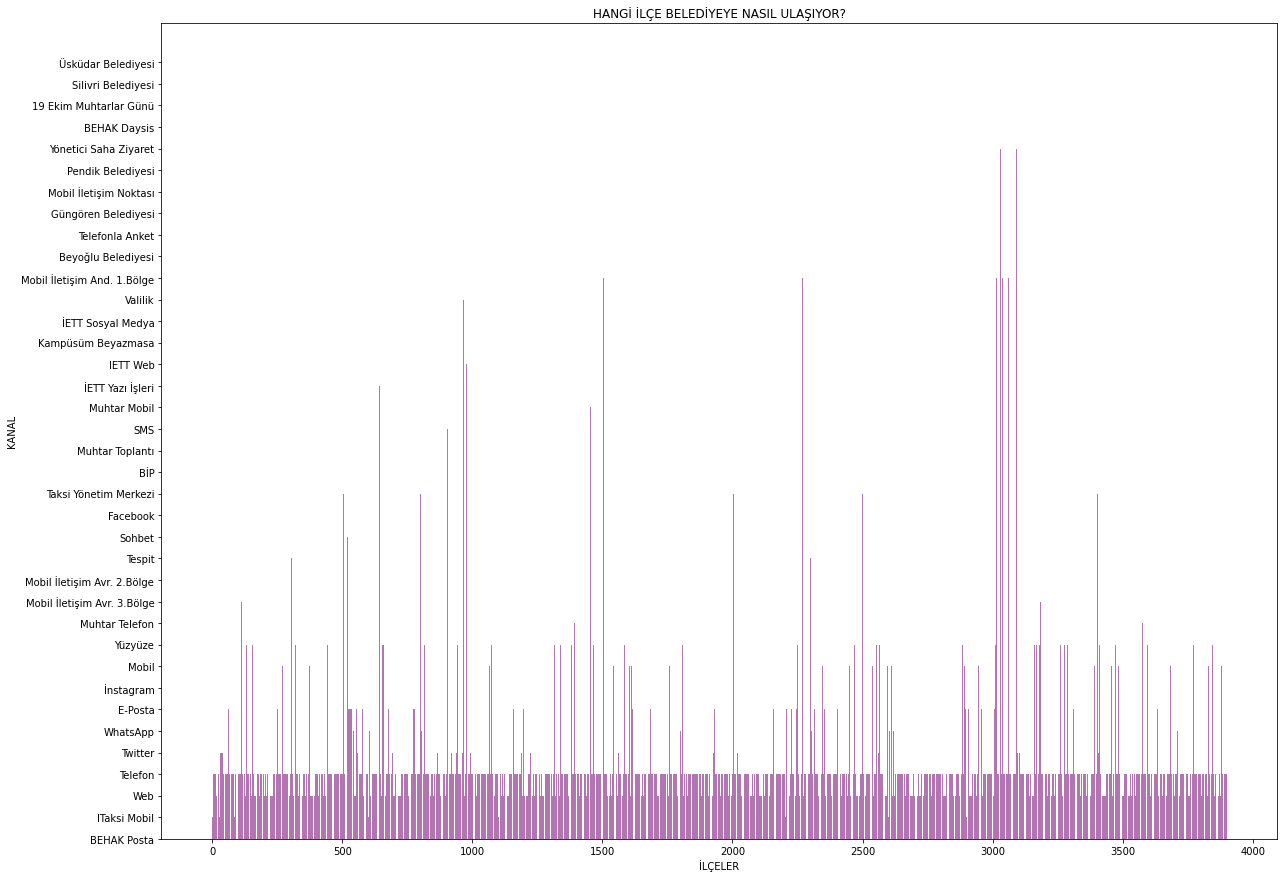

In [ ]:
height = df_lokasyon["KANAL"]
bars = df_lokasyon['ILCE']
y_pos = np.arange(len(bars))
plt.figure(figsize = (20, 15))
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

plt.title('HANGİ İLÇE BELEDİYEYE NASIL ULAŞIYOR?')
plt.xlabel('İLÇELER')
plt.ylabel('KANAL')

In [ ]:
#İlçeler ve çağrıların zamana göre ilişkisinin görselleştirilmesi

Text(0, 0.5, 'AÇILIŞ AYI')

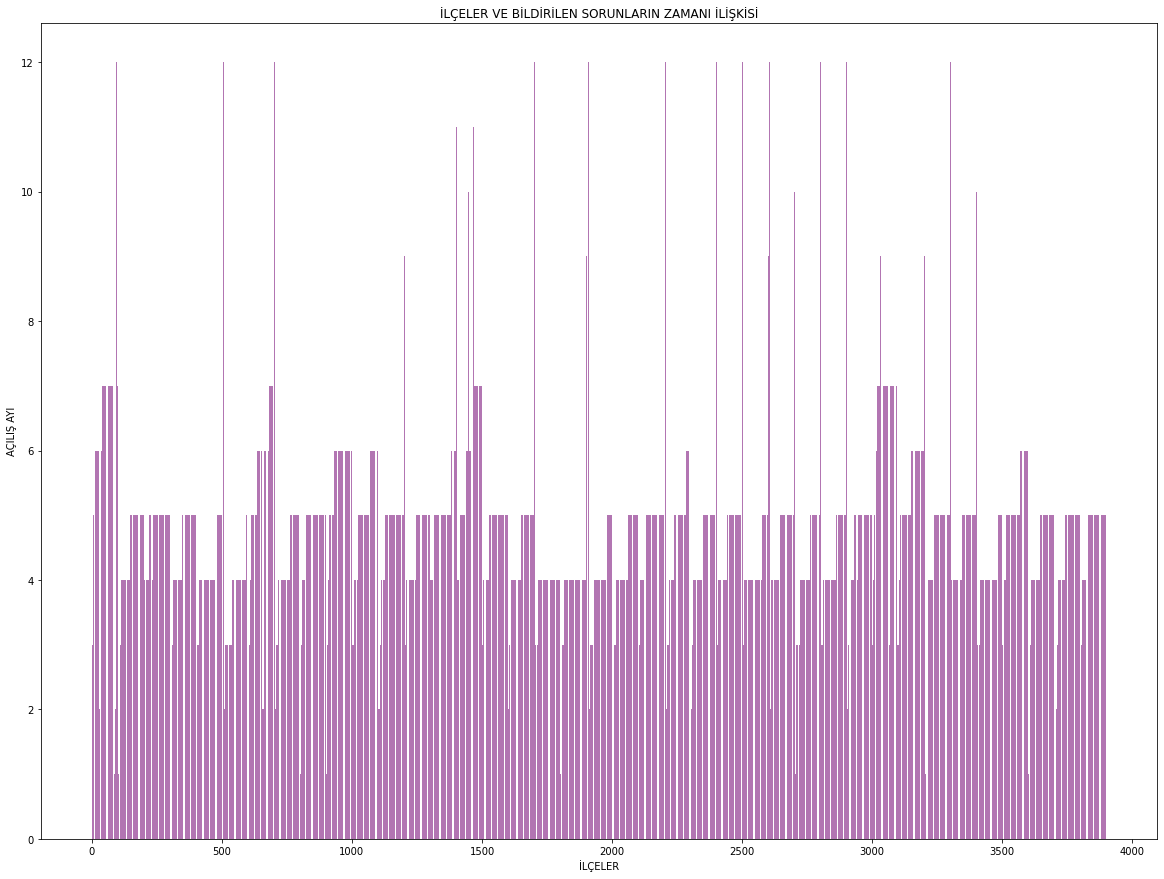

In [ ]:
height = df_lokasyon["MONTH_O"]
bars = df_lokasyon['ILCE']
y_pos = np.arange(len(bars))
plt.figure(figsize = (20, 15))
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))

plt.title('İLÇELER VE BİLDİRİLEN SORUNLARIN ZAMANI İLİŞKİSİ')
plt.xlabel('İLÇELER')
plt.ylabel('AÇILIŞ AYI')

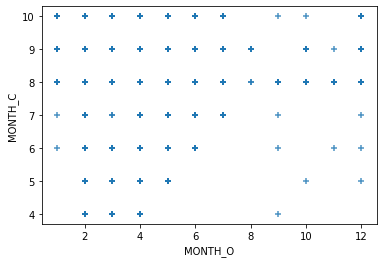

In [ ]:
sns.regplot(x=df_lokasyon["MONTH_O"], y=df_lokasyon["MONTH_C"], marker="+", fit_reg=False)

In [ ]:
#Ilçelere göre konuların Stack Plot ile görselleştirilmesi

No handles with labels found to put in legend.


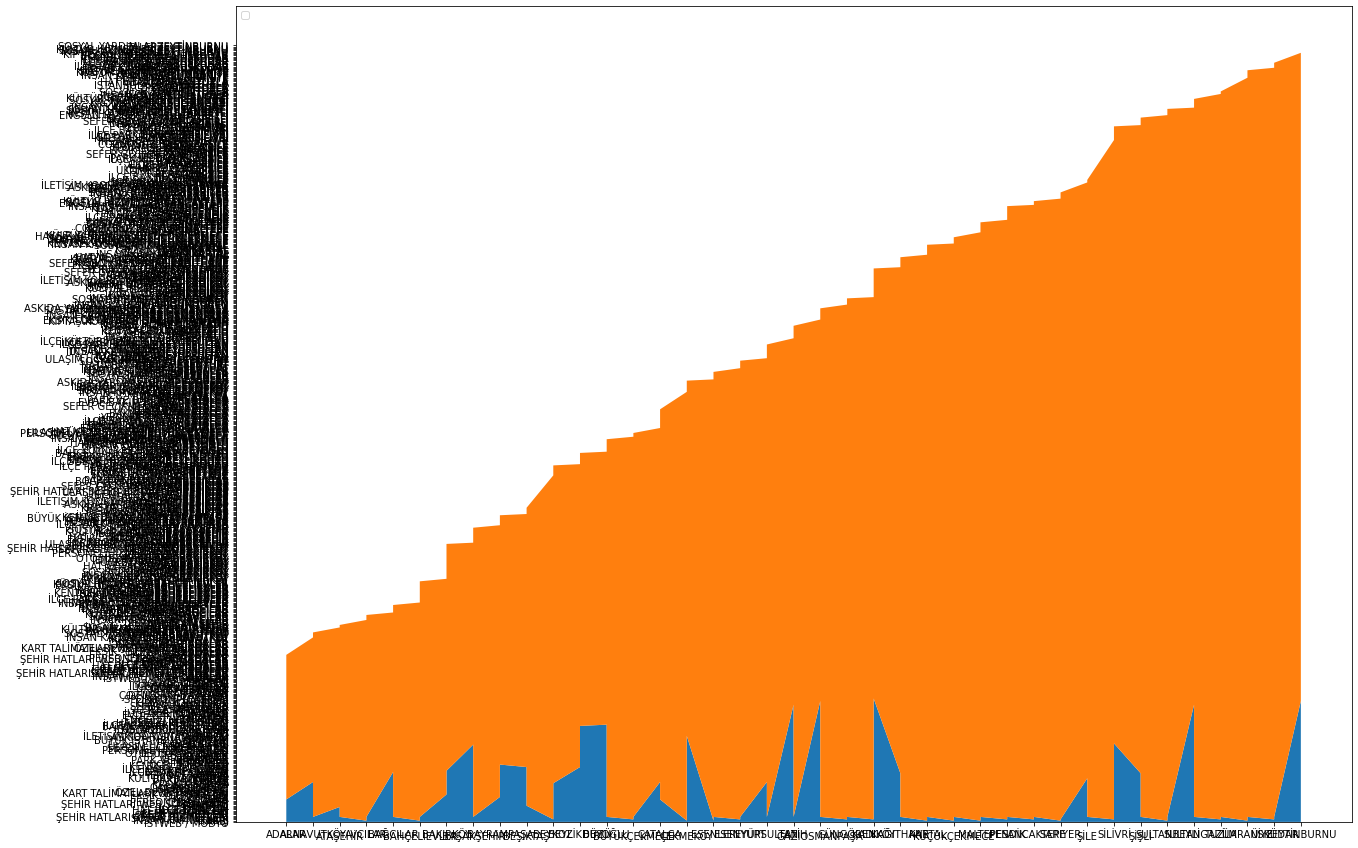

In [ ]:
x=df_lokasyon['ILCE']
y=df_lokasyon['KONU']
 
# Plot
plt.figure(figsize = (20, 15))
plt.stackplot(x,y, df_lokasyon['ILCE'])
plt.legend(loc='upper left')
plt.show()

In [ ]:
#ilçelere göre çağrıların kapanma sürelerinin Stack Plot ile görselleştirilmesi

No handles with labels found to put in legend.


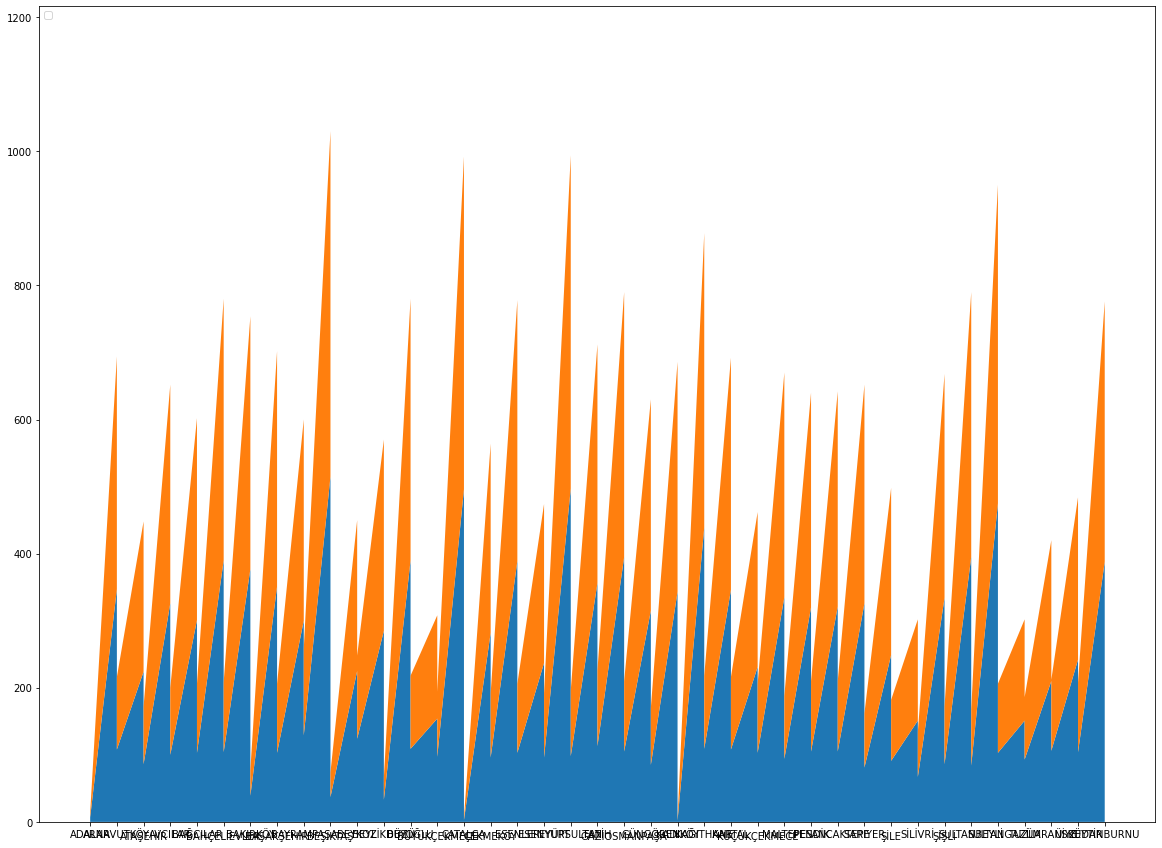

In [ ]:
x=df_lokasyon['ILCE']
y=df_lokasyon['diff_days']
 
# Plot
plt.figure(figsize = (20, 15))
plt.stackplot(x,y, df_lokasyon['diff_days'])
plt.legend(loc='upper left')
plt.show()

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/IBB_KODLUYORUZ/new_column_csv.csv', parse_dates= ["ACILIS_TARIHI", "KAPANIS_TARIHI", "ONLY_OPEN_DATE","ONLY_CLOSE_DATE"])

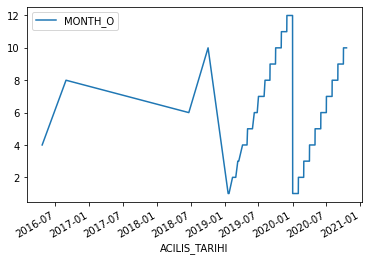

In [ ]:
# change the type of timestamp column for plotting
df2['ACILIS_TARIHI'] = pd.to_datetime(df2['ACILIS_TARIHI'])

# plot the data
df2.plot(x='ACILIS_TARIHI', y='MONTH_O')

In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df2['KANAL'] = labelencoder.fit_transform(df2['KANAL'])
df2

,Unnamed: 0,BASVURU_KODU,ACILIS_TARIHI,KAPANIS_TARIHI,BASVURU_TANIMI,ILGILI_BIRIM,KONU,ALT_KONU,KANAL,DURUM,ILCE,MAHALLE,ONLY_OPEN_DATE,TIME_O,MONTH_O,MONTH_NAME_O,DAY_O,diff_month,diff_days,diff_hours,ONLY_CLOSE_DATE,TIME_C,MONTH_C,MONTH_NAME_C,DAY_C
0,0,1-15193192054,2019-04-06 09:01:32,2020-09-02 20:33:08,Agac dusmesin diye direk koymuslardi ayag dire...,BEŞİKTAŞ BELEDİYESİ,İLÇE PARK BAHÇELER,PARK BAHÇELER,61,Kapandı,BEŞİKTAŞ,BALMUMCU,2019-04-06,09:01:32,4,April,6,17,515,12371,2020-09-02,20:33:08,9,September,2
1,1,1-15335992153,2019-04-11 10:46:13,2020-08-20 11:12:49,A-2 BLOK DAİRE 99 KAT 12 İKAMET ETMEKTEYİM ÇAT...,KİPTAŞ,KONUTLAR,DAİRE İÇİ AKSAKLIKLAR,99,Kapandı,EYÜPSULTAN,GÜZELTEPE,2019-04-11,10:46:13,4,April,11,16,497,11928,2020-08-20,11:12:49,8,August,20
2,2,1-15931298015,2019-04-30 11:30:41,2020-09-08 11:27:03,ÇATALCA KİPTAŞ KONUTLARI NORMALDE SON TARİH OL...,KİPTAŞ,KONUTLAR,TAPU,91,Kapandı,ÇATALCA,FERHATPAŞA,2019-04-30,11:30:41,4,April,30,17,496,11927,2020-09-08,11:27:03,9,September,8
3,3,1-16232695554,2019-05-08 12:47:53,2020-08-26 09:03:46,(çalıştığım kurumdaki haksızlıklar )ben cenaz...,İSPER A.Ş.,ŞEHİR TUVALETLERİ,WC ÜCRETLERİ,98,Kapandı,SULTANGAZİ,NaN,2019-05-08,12:47:53,5,May,8,15,475,11420,2020-08-26,09:03:46,8,August,26
4,4,1-16897632987,2019-05-29 17:18:26,2020-08-11 10:59:24,Cadde üzerinde bulunan trafik levhasının hasar...,TRAFİK MÜDÜRLÜĞÜ,YERİNDE ÇÖZÜM,LEVHA PROBLEMİ,93,Kapandı,KAĞITHANE,SEYRANTEPE,2019-05-29,17:18:26,5,May,29,15,439,10553,2020-08-11,10:59:24,8,August,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974929,2974929,1-35891868928,2020-10-17 23:49:34,2020-10-17 23:51:42,İLÇE BELEDİYESİ BV,BEYOĞLU BELEDİYESİ,İLÇE DENETİM,DENETİM,91,Kapandı,BEYOĞLU,NaN,2020-10-17,23:49:34,10,October,17,0,0,0,2020-10-17,23:51:42,10,October,17
2974930,2974930,1-35892287955,2020-10-17 23:51:28,2020-10-17 23:53:27,AY-Aksama Yok,İETT GENEL MÜDÜRLÜĞÜ,HAT VE GÜZERGAH,OTOBÜS ANLIK BİLGİ,91,Kapandı,KADIKÖY,NaN,2020-10-17,23:51:28,10,October,17,0,0,0,2020-10-17,23:53:27,10,October,17
2974931,2974931,1-35893768081,2020-10-17 23:54:04,2020-10-17 23:56:04,Sosyal yardım başvurusu hakkında bilgi verild...,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,İSTANBUL KART GIDA,91,Kapandı,SANCAKTEPE,NaN,2020-10-17,23:54:04,10,October,17,0,0,0,2020-10-17,23:56:04,10,October,17
2974932,2974932,1-35893903906,2020-10-17 23:55:46,2020-10-17 23:57:17,AY-Aksama Yok,İETT GENEL MÜDÜRLÜĞÜ,HAT VE GÜZERGAH,OTOBÜS ANLIK BİLGİ,91,Kapandı,KÜÇÜKÇEKMECE,İSTASYON,2020-10-17,23:55:46,10,October,17,0,0,0,2020-10-17,23:57:17,10,October,17


In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df2['ILCE'] = labelencoder.fit_transform(df2['ILCE'])
df2

,Unnamed: 0,BASVURU_KODU,ACILIS_TARIHI,KAPANIS_TARIHI,BASVURU_TANIMI,ILGILI_BIRIM,KONU,ALT_KONU,KANAL,DURUM,ILCE,MAHALLE,ONLY_OPEN_DATE,TIME_O,MONTH_O,MONTH_NAME_O,DAY_O,diff_month,diff_days,diff_hours,ONLY_CLOSE_DATE,TIME_C,MONTH_C,MONTH_NAME_C,DAY_C
0,0,1-15193192054,2019-04-06 09:01:32,2020-09-02 20:33:08,Agac dusmesin diye direk koymuslardi ayag dire...,BEŞİKTAŞ BELEDİYESİ,İLÇE PARK BAHÇELER,PARK BAHÇELER,61,Kapandı,128,BALMUMCU,2019-04-06,09:01:32,4,April,6,17,515,12371,2020-09-02,20:33:08,9,September,2
1,1,1-15335992153,2019-04-11 10:46:13,2020-08-20 11:12:49,A-2 BLOK DAİRE 99 KAT 12 İKAMET ETMEKTEYİM ÇAT...,KİPTAŞ,KONUTLAR,DAİRE İÇİ AKSAKLIKLAR,99,Kapandı,244,GÜZELTEPE,2019-04-11,10:46:13,4,April,11,16,497,11928,2020-08-20,11:12:49,8,August,20
2,2,1-15931298015,2019-04-30 11:30:41,2020-09-08 11:27:03,ÇATALCA KİPTAŞ KONUTLARI NORMALDE SON TARİH OL...,KİPTAŞ,KONUTLAR,TAPU,91,Kapandı,691,FERHATPAŞA,2019-04-30,11:30:41,4,April,30,17,496,11927,2020-09-08,11:27:03,9,September,8
3,3,1-16232695554,2019-05-08 12:47:53,2020-08-26 09:03:46,(çalıştığım kurumdaki haksızlıklar )ben cenaz...,İSPER A.Ş.,ŞEHİR TUVALETLERİ,WC ÜCRETLERİ,98,Kapandı,573,NaN,2019-05-08,12:47:53,5,May,8,15,475,11420,2020-08-26,09:03:46,8,August,26
4,4,1-16897632987,2019-05-29 17:18:26,2020-08-11 10:59:24,Cadde üzerinde bulunan trafik levhasının hasar...,TRAFİK MÜDÜRLÜĞÜ,YERİNDE ÇÖZÜM,LEVHA PROBLEMİ,93,Kapandı,387,SEYRANTEPE,2019-05-29,17:18:26,5,May,29,15,439,10553,2020-08-11,10:59:24,8,August,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974929,2974929,1-35891868928,2020-10-17 23:49:34,2020-10-17 23:51:42,İLÇE BELEDİYESİ BV,BEYOĞLU BELEDİYESİ,İLÇE DENETİM,DENETİM,91,Kapandı,123,NaN,2020-10-17,23:49:34,10,October,17,0,0,0,2020-10-17,23:51:42,10,October,17
2974930,2974930,1-35892287955,2020-10-17 23:51:28,2020-10-17 23:53:27,AY-Aksama Yok,İETT GENEL MÜDÜRLÜĞÜ,HAT VE GÜZERGAH,OTOBÜS ANLIK BİLGİ,91,Kapandı,348,NaN,2020-10-17,23:51:28,10,October,17,0,0,0,2020-10-17,23:53:27,10,October,17
2974931,2974931,1-35893768081,2020-10-17 23:54:04,2020-10-17 23:56:04,Sosyal yardım başvurusu hakkında bilgi verild...,SOSYAL HİZMETLER MÜDÜRLÜĞÜ,SOSYAL HİZMETLER,İSTANBUL KART GIDA,91,Kapandı,535,NaN,2020-10-17,23:54:04,10,October,17,0,0,0,2020-10-17,23:56:04,10,October,17
2974932,2974932,1-35893903906,2020-10-17 23:55:46,2020-10-17 23:57:17,AY-Aksama Yok,İETT GENEL MÜDÜRLÜĞÜ,HAT VE GÜZERGAH,OTOBÜS ANLIK BİLGİ,91,Kapandı,437,İSTASYON,2020-10-17,23:55:46,10,October,17,0,0,0,2020-10-17,23:57:17,10,October,17


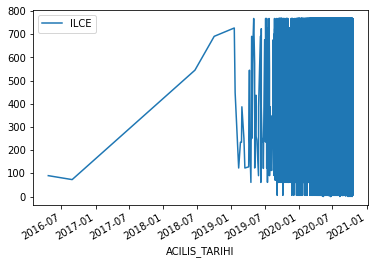

In [ ]:
df2.plot(x='ACILIS_TARIHI', y='ILCE')